# PyTorch Neural Network Classification Model -> 

#### Contents -> 
- Architecture of a Neural Network.
- Input and Output Shapes (Features and Labels).
- Creation of Custom data to view,fit and predict on.
- Model Creation -> Optimiser and Loss Function -> Training and Evaluating 
- Saving and Loading 
- Concept of Non - Linearity 
- Different classfication evaluation models 

In [151]:
try:
    import torch
    import torchvision
    from torch import nn
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import sklearn
    print("Import successful!")
except:
    print("Import not successful!")

Import successful!


#### Classification Problem Input and Output Shapes →
- Input is usually Images
- Output is usually Prediction of what the image is/probabilities of different `classes

##### Input and Output Shapes -> 
- Inputs are Tensors like `[batch_size, colour_channels, width, height]`
    - Ex -> `[32,3,224,224]`
- Outputs are Tensors like `[0.002 , 0.000, ... , 0.991 , 0.004]` of constant shape representing probabilities of classification. Output shape depends upon the number of classifications
        


#### Architecture of a Classification Neural Network -> 

| Hyperparameter | Binary Classification | Multiclass classification |
|---|---|---|
| Input layer shape (in_features) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 512 | Same as binary classification |
| Output layer shape (out_features) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden layer activation | Usually ReLU (rectified linear unit) but can be many others | Same as binary classification |
| Output activation | Sigmoid (torch.sigmoid in PyTorch) | Softmax (torch.softmax in PyTorch) |
| Loss function | Binary crossentropy (torch.nn.BCELoss in PyTorch) | Cross entropy (torch.nn.CrossEntropyLoss in PyTorch) |
| Optimizer | SGD (stochastic gradient descent), Adam (see torch.optim for more options) | Same as binary classification |



#### Working with a Classification Model on a Toy Dataset

In [152]:
#1.Data -> 

from sklearn.datasets import make_circles
n_samples=500

X , y= make_circles(n_samples,noise=0.03,random_state=42)
len(X),len(y)

(500, 500)

In [153]:
X,y

(array([[-0.75093268,  0.2983924 ],
        [-0.20283523,  0.97779788],
        [-0.7827143 ,  0.02454953],
        [-0.69379555, -0.66860511],
        [-0.84145025,  0.55789191],
        [-0.70369963, -0.37579276],
        [-0.78560088, -0.00610819],
        [-0.98464139,  0.05694925],
        [-0.15785954,  0.9644189 ],
        [ 0.23086247, -0.79886668],
        [ 0.97783586,  0.21137   ],
        [ 0.19954351, -1.02542268],
        [-0.52258086, -0.59155599],
        [-0.55158646,  0.83278712],
        [-0.73742241,  0.07908682],
        [-0.74179558, -0.26227164],
        [ 0.7909894 , -0.11544299],
        [ 0.73049095,  0.6993851 ],
        [-0.01993179,  0.74067282],
        [-0.49194164, -0.57417168],
        [ 0.76383365, -0.21538361],
        [ 0.81093177, -0.17254725],
        [ 0.53715295,  0.55852977],
        [-0.67617801,  0.39339983],
        [-0.35162528,  0.90273032],
        [ 0.4357213 , -0.56685717],
        [ 0.75137715, -0.0855435 ],
        [ 0.56863687, -0.834

In [154]:
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})

circles.tail(10)

,X1,X2,label
490,-1.007996,0.079635,0
491,0.849916,0.007584,1
492,0.820261,0.422530,0
493,0.043844,-1.015517,0
494,-0.261480,1.008640,0
495,-0.883063,0.467127,0
496,0.725332,0.346104,1
497,-0.671715,0.549582,1
498,-0.093347,-0.835089,1
499,-0.868201,0.608793,0


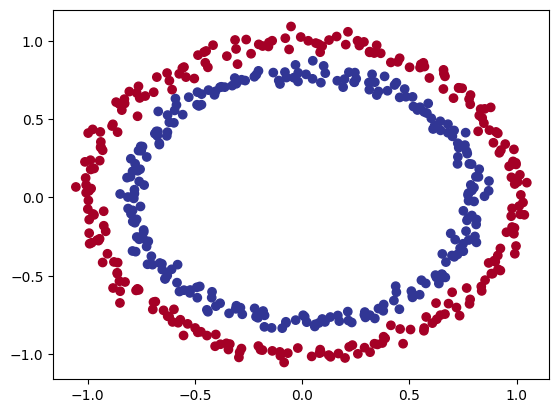

In [155]:
plt.scatter(x=X[:,0] , y=X[:,1], c=y,cmap=plt.cm.RdYlBu)

#### Checking Input and Output Shapes -> 

In [156]:
X.shape, y.shape

((500, 2), (500,))

In [157]:
X_sample , y_sample = X[0] , y[0]
print(X_sample) 
print(y_sample) 
print(X_sample.shape) 
print(y_sample.shape) 

[-0.75093268  0.2983924 ]
1
(2,)
()


In [158]:
#Turning data into tensors -> 
print(X)
# X = torch.from_numpy(X).type(torch.float)
# y = torch.from_numpy(y).type(torch.float)
type(X), X.dtype, y.dtype

[[-0.75093268  0.2983924 ]
 [-0.20283523  0.97779788]
 [-0.7827143   0.02454953]
 [-0.69379555 -0.66860511]
 [-0.84145025  0.55789191]
 [-0.70369963 -0.37579276]
 [-0.78560088 -0.00610819]
 [-0.98464139  0.05694925]
 [-0.15785954  0.9644189 ]
 [ 0.23086247 -0.79886668]
 [ 0.97783586  0.21137   ]
 [ 0.19954351 -1.02542268]
 [-0.52258086 -0.59155599]
 [-0.55158646  0.83278712]
 [-0.73742241  0.07908682]
 [-0.74179558 -0.26227164]
 [ 0.7909894  -0.11544299]
 [ 0.73049095  0.6993851 ]
 [-0.01993179  0.74067282]
 [-0.49194164 -0.57417168]
 [ 0.76383365 -0.21538361]
 [ 0.81093177 -0.17254725]
 [ 0.53715295  0.55852977]
 [-0.67617801  0.39339983]
 [-0.35162528  0.90273032]
 [ 0.4357213  -0.56685717]
 [ 0.75137715 -0.0855435 ]
 [ 0.56863687 -0.83433166]
 [-0.82953874  0.62801058]
 [-0.43714943  0.68559291]
 [ 0.65327082 -0.4943703 ]
 [-0.48872008  0.67255625]
 [ 0.10464241 -0.7862839 ]
 [-0.3537097  -0.93184703]
 [ 0.99098442  0.08574879]
 [-0.40934514  0.65544344]
 [-0.57271822 -0.60103083]
 

(numpy.ndarray, dtype('float64'), dtype('int64'))

In [159]:
#Splitting Data -> 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,  #25% data is training
                                                    random_state=42) 

X_train, X_test, y_train, y_test

(array([[ 0.01133283, -0.76188203],
        [-0.86119221,  0.4171373 ],
        [-0.57883805, -0.80036623],
        [-0.43987416, -0.73022297],
        [-0.79051996, -0.15407636],
        [-0.48872008,  0.67255625],
        [ 0.83207882,  0.56437495],
        [ 0.61775526,  0.45947896],
        [ 0.35062849, -0.93895004],
        [-0.0613933 ,  0.94558744],
        [ 0.8731384 ,  0.43007032],
        [-0.65294094, -0.46083898],
        [-0.35162528,  0.90273032],
        [ 0.73049095,  0.6993851 ],
        [ 0.98715859, -0.23191238],
        [ 0.28966389, -0.74986003],
        [ 0.67009962, -0.41299082],
        [-0.84925083, -0.59901794],
        [-0.17580456, -0.7531713 ],
        [ 0.25934725, -0.99895509],
        [ 0.13093046, -0.76402977],
        [-0.67617801,  0.39339983],
        [ 0.65888072,  0.81503605],
        [-1.00797053,  0.03047737],
        [ 0.37944536, -0.88972418],
        [-0.70369963, -0.37579276],
        [ 1.01131371, -0.05579485],
        [-0.30870715,  0.948

## Building a model to classify Red and Blue dots 
1. Device Agnostic code
2. Construct a model by subclassing nn.Module
3. Define a Loss function and an Optimiser  
4. Creating a training and testing loop

In [160]:
device = "cuda" if torch.cuda.is_available else "cpu"
print(device)
print(X_train.shape)
print(y_train.shape)

#Storing all the data on the gpu after turning np arrays to tensors

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float).to(device)
y_test = torch.tensor(y_test, dtype=torch.float).to(device)

cuda
(375, 2)
(375,)


### Model Description -> 
1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handing the shapes of our data.
3. Defines a `forward()` function that does the forward computation 
4. Instantiate an instance of our model and send it to `device`

In [161]:
class CircleModelV1(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        #Creating nn.Linear layers with required shapes.
        self.layer1=nn.Linear(in_features=2,out_features=10) #Takes 2 features(X input R&B), Upscales to 10
        self.layer2=nn.Linear(in_features=10,out_features=1) #Takes 10 from layer1 -> gives 1(Y output 0/1)
        
        #Another way -> 
        # self.two_linear_layers = nn.Sequential(
        #     nn.Linear(in_features=2,out_features=10),
        #     nn.Linear(in_features=10,out_features=1)
        # ).to(device)
        
        def forward(self,x):
            return self.layer2(self.layer1(x)) # x--> layer1 --> layer2
            # return self.two_linear_layers(x)
        

In [162]:
model_0= CircleModelV1().to(device)
print(model_0)

next(model_0.parameters()).device

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)


device(type='cuda', index=0)

### More visualisation on https://playground.tensorflow.org/

In [163]:
#Alternative way to create simpler models -> 

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.Linear(in_features=10,out_features=1)
    ).to(device)

print(model_0)

print(model_0.state_dict())

#^^ First layer has 2 * 10 = 20 parameters and Second layer has 10 * 1 = 10 parameters. More the hidden layers mode the number of paramters. 

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)
OrderedDict({'0.weight': tensor([[-0.1918,  0.2976],
        [ 0.6313,  0.4087],
        [-0.3091,  0.4082],
        [ 0.1265,  0.3591],
        [-0.4310, -0.7000],
        [-0.2732, -0.5424],
        [ 0.5802,  0.2037],
        [ 0.2929,  0.2236],
        [-0.0123,  0.5534],
        [-0.5024,  0.0445]], device='cuda:0'), '0.bias': tensor([-0.4826,  0.2180, -0.2435,  0.2167, -0.1473,  0.5865, -0.4191, -0.4217,
        -0.4217,  0.6360], device='cuda:0'), '1.weight': tensor([[ 0.1054,  0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,  0.1132,
          0.2628, -0.1633]], device='cuda:0'), '1.bias': tensor([-0.2156], device='cuda:0')})


In [164]:
#Making predictions from untrained data -> 
with torch.inference_mode():
    untrained_pred=torch.round(model_0(X_test)) #Without torch.round, Predictions are of type 0.88 But Test are either 0 or 1.
print(f"Length of Untrained Predictions :{len(untrained_pred)} & Shape: {untrained_pred.shape}")
print(f"Length of X_test  :{len(X_test)} & Shape: {X_test.shape}")

#Shape is different just because of one extra bracket, Can be remove by Squeeze.
print(untrained_pred)
print(y_test)

Length of Untrained Predictions :125 & Shape: torch.Size([125, 1])
Length of X_test  :125 & Shape: torch.Size([125, 2])
tensor([[-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [ 0.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-

### Setting up Loss Function and Optimisers

- Loss Function : 
    - For Regression -> MSE or MAE
    - For Classification -> Binary Cross Entropy or Categorical Cross Entropy

| Loss function/Optimizer | Problem type | PyTorch Code |
|---|---|---|
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | torch.optim.SGD() |
| Adam Optimizer | Classification, regression, many others. | torch.optim.Adam() |
| Binary cross entropy loss | Binary classification | torch.nn.BCELossWithLogits or torch.nn.BCELoss |
| Cross entropy loss | Mutli-class classification | torch.nn.CrossEntropyLoss |
| Mean absolute error (MAE) or L1 Loss | Regression | torch.nn.L1Loss |
| Mean squared error (MSE) or L2 Loss | Regression | torch.nn.MSELoss |
| Loss function | Binary crossentropy (torch.nn.BCELoss in PyTorch) | Cross entropy (torch.nn.CrossEntropyLoss in PyTorch) |
| Optimizer | SGD (stochastic gradient descent), Adam (see torch.optim for more options) | Same as binary classification |

The BCELoss() expects the inputs to be already passed through the sigmoid activation function but the BCELossWithLogits() doesnt.

Also High level, **BCEWithLogitsLoss() => nn.Sigmoid() --> nn.BCELoss()**

But in reality, BCEWithLogitsLoss() is more numerically stable than doing the above sequentially as it takes advantage of **log-sum-exp trick**.


In [165]:
# loss_fn=nn.BCELoss() #This requires the inputs to the function to be already passed through the sigmoid activation function.
loss_fn=nn.BCEWithLogitsLoss()  #BCEWithLogitsLoss -> Built in Sigmoid Activation Function


In [166]:
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [167]:
#Defining an accuracy function -->

def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred)) *100
    return acc


### Training the Model -> 

    - Forward Pass
    - Calculate the loss
    - Optimizer zero grad
    - Back Propagation / Loss Backward
    - Gradient Descent / Optimizer Step

##### 1. Going from Raw Logits -> Prediction Probabilities -> Prediction Labels

- Our model outputs are raw **logits**.

- We can convert these **logits** to *prediction probabilities* using an Activation Function -> 
    - Sigmoid Function for Binary Classification
    - Softmax Function for Multiclass Classification

- Then we can convert the *prediction probabilities* to **prediction labels** by either rounding off or using argmax().


In [168]:
model_0.eval()

with torch.inference_mode():
    y_logits = model_0(X_test.to(device))

y_logits

tensor([[-0.0682],
        [-0.0575],
        [-0.0525],
        [-0.8446],
        [-0.5335],
        [-0.0441],
        [-1.2592],
        [-0.2714],
        [-0.1755],
        [-0.0803],
        [-0.8100],
        [-0.9665],
        [-0.1842],
        [-0.3544],
        [-1.0280],
        [-1.2986],
        [-0.9132],
        [-0.4455],
        [-1.1142],
        [-0.0076],
        [-1.1443],
        [-0.1265],
        [-0.1398],
        [-0.3846],
        [-0.0522],
        [-0.1598],
        [-0.7598],
        [-1.0912],
        [-0.9814],
        [-1.1994],
        [-1.1126],
        [-1.1431],
        [-0.6051],
        [-1.0442],
        [-1.0401],
        [ 0.0904],
        [-0.8429],
        [-0.7907],
        [-0.8944],
        [-0.3666],
        [-0.6124],
        [-0.4044],
        [-0.5779],
        [-1.2751],
        [-1.1948],
        [-0.3121],
        [-0.9087],
        [-0.9216],
        [-0.2676],
        [-0.0744],
        [-0.0599],
        [-1.1641],
        [-1.

In [169]:
y_pred_probs=torch.sigmoid(y_logits)
print(y_pred_probs)
print("\n\nAfter Rounding Off ->")
#Finding the predicted labels -> 
y_pred= torch.round(y_pred_probs)
y_pred

tensor([[0.4830],
        [0.4856],
        [0.4869],
        [0.3006],
        [0.3697],
        [0.4890],
        [0.2211],
        [0.4326],
        [0.4562],
        [0.4799],
        [0.3079],
        [0.2756],
        [0.4541],
        [0.4123],
        [0.2635],
        [0.2144],
        [0.2863],
        [0.3904],
        [0.2471],
        [0.4981],
        [0.2415],
        [0.4684],
        [0.4651],
        [0.4050],
        [0.4870],
        [0.4601],
        [0.3187],
        [0.2514],
        [0.2726],
        [0.2316],
        [0.2474],
        [0.2418],
        [0.3532],
        [0.2603],
        [0.2611],
        [0.5226],
        [0.3009],
        [0.3120],
        [0.2902],
        [0.4094],
        [0.3515],
        [0.4002],
        [0.3594],
        [0.2184],
        [0.2324],
        [0.4226],
        [0.2873],
        [0.2846],
        [0.4335],
        [0.4814],
        [0.4850],
        [0.2379],
        [0.2672],
        [0.2176],
        [0.4831],
        [0

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [170]:
#In full , y_predictions -> Sigmoid -> Rounded  or logits -> prediction probabilities -> prediction labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)))

#Checking for equality -> 
print(torch.eq(y_pred.squeeze(),y_pred_labels.squeeze()))
print(y_pred.squeeze())
print(y_pred_labels.squeeze())

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True], device='cuda:0')
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

### Building and Running Training and Testing loops -> 


In [171]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

X_train, y_train, X_test, y_test= X_train.to(device),y_train.to(device),X_test.to(device),y_test.to(device)
X_train

tensor([[ 0.0113, -0.7619],
        [-0.8612,  0.4171],
        [-0.5788, -0.8004],
        [-0.4399, -0.7302],
        [-0.7905, -0.1541],
        [-0.4887,  0.6726],
        [ 0.8321,  0.5644],
        [ 0.6178,  0.4595],
        [ 0.3506, -0.9390],
        [-0.0614,  0.9456],
        [ 0.8731,  0.4301],
        [-0.6529, -0.4608],
        [-0.3516,  0.9027],
        [ 0.7305,  0.6994],
        [ 0.9872, -0.2319],
        [ 0.2897, -0.7499],
        [ 0.6701, -0.4130],
        [-0.8493, -0.5990],
        [-0.1758, -0.7532],
        [ 0.2593, -0.9990],
        [ 0.1309, -0.7640],
        [-0.6762,  0.3934],
        [ 0.6589,  0.8150],
        [-1.0080,  0.0305],
        [ 0.3794, -0.8897],
        [-0.7037, -0.3758],
        [ 1.0113, -0.0558],
        [-0.3087,  0.9485],
        [ 0.7910, -0.1154],
        [ 0.3145,  0.9315],
        [-0.1429, -0.8333],
        [-0.6938, -0.6686],
        [-0.6804,  0.4220],
        [ 0.8053, -0.2492],
        [ 0.7682, -0.1464],
        [-0.9916, -0

In [172]:

epochs=100
for epoch in range(epochs):
    model_0.train()
    
    #Forward Pass -> 
    y_logits = model_0(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    
    
    #Calculating loss, Accuracy
    loss = loss_fn(y_logits , y_train)  # Usually we have passed y_pred here but as our loss fn is bcewith logits, It expects logits.
    #We couldve done loss = nn.BCELoss(torch.sigmoid(y_logits),y_test) but not doing it for numerical stability.
    accuracy = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    
    #Optimiser Zero Grad -> 
    optimizer.zero_grad()
    
    #Back Propagation
    loss.backward()
    
    #Optimiser step -> 
    optimizer.step()
    
    
    #Testing -->
    model_0.eval()
    
    with torch.inference_mode():
        
        test_logits=model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,y_test)
        test_accuracy =accuracy_fn(y_test,test_pred)
        
    if epoch%100==0:
        print(f"Epoch -> {epoch}\nTraining Loss -> {loss}\nTesting Loss -> {test_loss}\nTraining Accuracy -> {accuracy}%\nTesting Accuracy -> {test_accuracy}%\n\n\n")

Epoch -> 0
Training Loss -> 0.760085940361023
Testing Loss -> 0.7554232478141785
Training Accuracy -> 41.6%
Testing Accuracy -> 41.6%





Maza nahi aaya

#### Making predictions and Evaluating our model -> 

The model learning and accuracy isnt getting better. Tried 100000 epochs too. 
So lets inspect the model and make some predictions. 

Trying to Visualise -->
- We will use `plot_decision_boundary()`

In [173]:
from helper_functions import plot_decision_boundary, plot_predictions

#Both of these functions are in the helper_functions.py

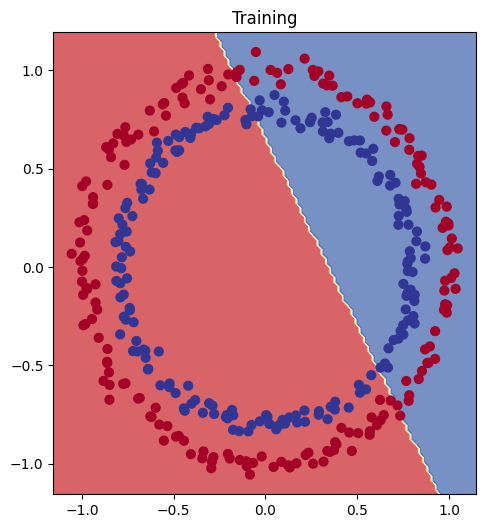

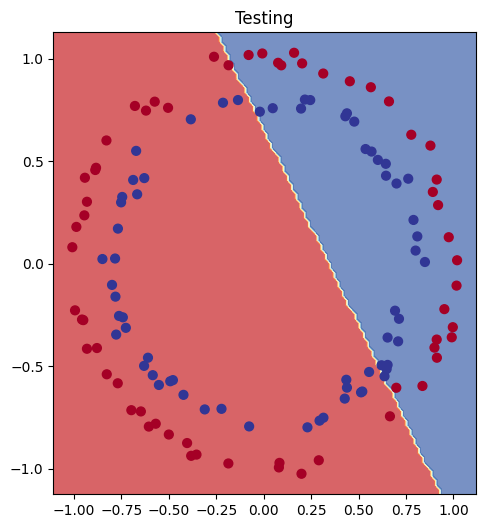

In [174]:
#Plotting -> 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_0,X_train,y_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_0,X_test,y_test)

The above distribution is coming out as a "Straight Line" because we have only used Linear layers. 

### Improving the model

- Add more layers -> Gives the model, More chance to learn and understand data
- Add more hidden units -> Add more in/out_features in our layers
- Fit for longer -> Increased Epochs 
- **Changing the activation functions**
- Changing the loss function 

As we set and change them rather than random input and they deal directly with the model, We call them **Model Hyperparameters**

In [175]:
#Trying to add more Layers , Hidden Units and Epoch -> 

#It is better to do it like => Add Layers -> Track Results , Add HU -> TR , Increase E -> TR so we easily get to know on which hyperparameter's change the output got better/worse. This is called Experiment Tracking in machine learning.

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1=nn.Linear(in_features=2, out_features=128)
        self.layer2=nn.Linear(in_features=128, out_features=128)  #out_features => 10 -> 128
        self.layer3=nn.Linear(in_features=128, out_features=1)  #Number of layers => 2 -> 3
        
    def forward(self,x:torch.Tensor) -> torch.Tensor :
        return self.layer3(self.layer2(self.layer1(x)))
    
model_1=CircleModelV2().to(device)


In [176]:
print(model_0.state_dict())
print("\n\n")
print(model_1.state_dict())


OrderedDict({'0.weight': tensor([[-0.2052,  0.2937],
        [ 0.5719,  0.3913],
        [-0.2407,  0.4258],
        [ 0.2061,  0.3788],
        [-0.3854, -0.6863],
        [-0.2529, -0.5345],
        [ 0.5811,  0.2006],
        [ 0.2892,  0.2205],
        [-0.0587,  0.5403],
        [-0.4961,  0.0492]]), '0.bias': tensor([-0.4717,  0.2622, -0.2857,  0.1693, -0.1822,  0.5636, -0.4079, -0.4113,
        -0.3879,  0.6206]), '1.weight': tensor([[ 0.0631,  0.1686, -0.2597, -0.3477, -0.1293, -0.0278, -0.0888, -0.0347,
          0.1758,  0.0508]]), '1.bias': tensor([-0.0632])})



OrderedDict({'layer1.weight': tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998],
        [ 0.5451,  0.1045],
        [-0.3301,  0.1802],
        [-0.3258, -0.0829],
        [-0.2872,  0.4691],
        [-0.5582, -0.3260],
        [-0.1997, -0.4252

In [177]:
#Initiating loss function , optimizer, seed and epochs 
loss_fn = nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1001 #Increased from 100 -> 1000

#Device agnostic code
X_train, X_test, y_train, y_test = X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)



In [178]:
for epoch in range(epochs):
    
    #Training ->
    model_1.train()
    y_prediction_logits= model_1(X_train).squeeze()
    y_prediction_labels = torch.round(torch.sigmoid(y_prediction_logits))
    loss=loss_fn(y_prediction_logits,y_train)
    accuracy=accuracy_fn(y_true=y_train, y_pred=y_prediction_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #Testing -> 
    model_1.eval()
    with torch.inference_mode():
        test_prediction_logits = model_1(X_test).squeeze()
        test_prediction_labels = torch.round(torch.sigmoid(test_prediction_logits))
        test_loss = loss_fn(test_prediction_labels,y_test)
        accuracy=accuracy_fn(y_true=y_test, y_pred= test_prediction_labels)
    
    #Printing -> 
    if epoch%200 == 0:
        print(f"Epoch -> {epoch}\nTraining Loss -> {loss}\nTesting Loss -> {test_loss}\nTraining Accuracy -> {accuracy}%\nTesting Accuracy -> {test_accuracy}%")

Epoch -> 0
Training Loss -> 0.6935146450996399
Testing Loss -> 0.7519194483757019
Training Accuracy -> 48.0%
Testing Accuracy -> 49.6%
Epoch -> 200
Training Loss -> 0.6928898096084595
Testing Loss -> 0.7651930451393127
Training Accuracy -> 44.0%
Testing Accuracy -> 49.6%
Epoch -> 400
Training Loss -> 0.6928898096084595
Testing Loss -> 0.7651930451393127
Training Accuracy -> 44.0%
Testing Accuracy -> 49.6%
Epoch -> 600
Training Loss -> 0.6928898096084595
Testing Loss -> 0.7651930451393127
Training Accuracy -> 44.0%
Testing Accuracy -> 49.6%
Epoch -> 800
Training Loss -> 0.6928898096084595
Testing Loss -> 0.7651930451393127
Training Accuracy -> 44.0%
Testing Accuracy -> 49.6%
Epoch -> 1000
Training Loss -> 0.6928898096084595
Testing Loss -> 0.7651930451393127
Training Accuracy -> 44.0%
Testing Accuracy -> 49.6%


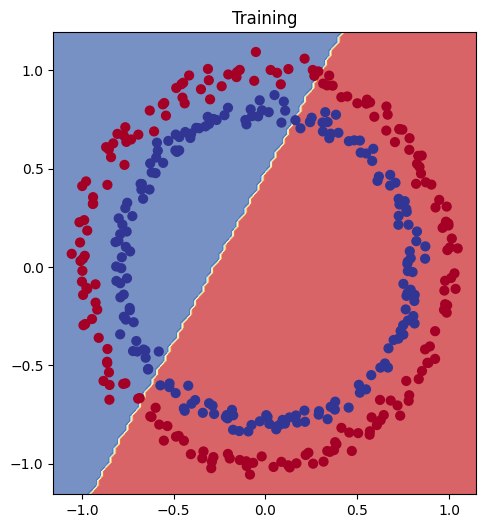

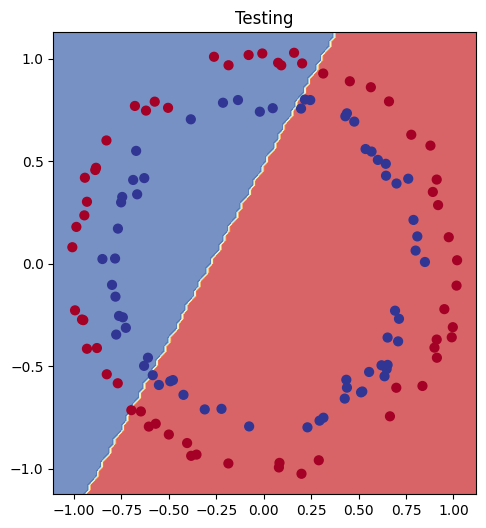

In [179]:
#Plotting -> 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_1,X_train,y_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_1,X_test,y_test)

### This looks like the model is not learning anything at all.

Preparing a dataset to see if our model can fit onto a straight line data.

One way to troubleshoot a larger problem is to test on a smaller problem.

In [180]:
#Creating data, Same as 01_PyTorch_Fundamentals 's Weight, Bias Data.

weight = 0.3
bias = 0.7

X_regression=torch.arange(1.,2,0.0002).unsqueeze(dim= 1)
y_regression= weight*X_regression + bias


In [181]:
#Creating Training and Test Splits -> 
training_split=int(0.8*len(X_regression))
print(training_split)

X_regression_train,X_regression_test,y_regression_train, y_regression_test = X_regression[:training_split].to(device),X_regression[training_split:].to(device),y_regression[:training_split].to(device),y_regression[training_split:].to(device)

X_regression_test,X_regression_train,y_regression_test,y_regression_train




4000


(tensor([[1.8000],
         [1.8002],
         [1.8004],
         [1.8006],
         [1.8008],
         [1.8010],
         [1.8012],
         [1.8014],
         [1.8016],
         [1.8018],
         [1.8020],
         [1.8022],
         [1.8024],
         [1.8026],
         [1.8028],
         [1.8030],
         [1.8032],
         [1.8034],
         [1.8036],
         [1.8038],
         [1.8040],
         [1.8042],
         [1.8044],
         [1.8046],
         [1.8048],
         [1.8050],
         [1.8052],
         [1.8054],
         [1.8056],
         [1.8058],
         [1.8060],
         [1.8062],
         [1.8064],
         [1.8066],
         [1.8068],
         [1.8070],
         [1.8072],
         [1.8074],
         [1.8076],
         [1.8078],
         [1.8080],
         [1.8082],
         [1.8084],
         [1.8086],
         [1.8088],
         [1.8090],
         [1.8092],
         [1.8094],
         [1.8096],
         [1.8098],
         [1.8100],
         [1.8102],
         [1.

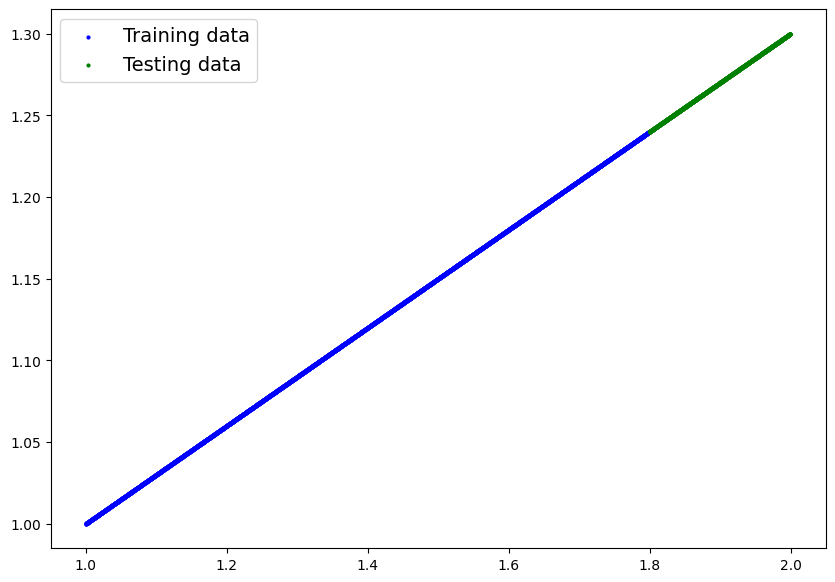

In [182]:
plot_predictions(train_data=X_regression_train.cpu(), train_labels=y_regression_train.cpu(), test_data=X_regression_test.cpu(), test_labels=y_regression_test.cpu())

### Fitting model_1 onto a straight line -> 

In [183]:
#Same architecture as Model_1 but using sequential for practice -> 
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1))

model_2= model_2.to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [184]:
loss_fn_reg=nn.L1Loss()
optimizer_reg=torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [185]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1001
for epoch in range(epochs):
    #Training
    model_2.train()
    y_pred_reg=model_2(X_regression_train)
    loss_reg=loss_fn_reg(y_pred_reg,y_regression_train)
    optimizer_reg.zero_grad()
    loss_reg.backward()
    optimizer_reg.step()
    
    #Testing 
    model_2.eval()
    with torch.inference_mode():
        test_y_pred_reg=model_2(X_regression_test)
        test_loss_reg=loss_fn_reg(test_y_pred_reg,y_regression_test)
        
    if epoch%2==0:
        print(f"Epoch ->{epoch}\nTraining Loss -> {loss_reg}\nTesting Loss -> {test_loss_reg}")

Epoch ->0
Training Loss -> 0.9900075197219849
Testing Loss -> 0.864233672618866
Epoch ->2
Training Loss -> 0.7975643873214722
Testing Loss -> 0.6222594976425171
Epoch ->4
Training Loss -> 0.6021629571914673
Testing Loss -> 0.37323448061943054
Epoch ->6
Training Loss -> 0.39986133575439453
Testing Loss -> 0.11207698285579681
Epoch ->8
Training Loss -> 0.18651480972766876
Testing Loss -> 0.16665534675121307
Epoch ->10
Training Loss -> 0.10358717292547226
Testing Loss -> 0.22192132472991943
Epoch ->12
Training Loss -> 0.10156206041574478
Testing Loss -> 0.22692115604877472
Epoch ->14
Training Loss -> 0.10040134936571121
Testing Loss -> 0.2255023568868637
Epoch ->16
Training Loss -> 0.09926608949899673
Testing Loss -> 0.22313310205936432
Epoch ->18
Training Loss -> 0.09813838452100754
Testing Loss -> 0.22065021097660065
Epoch ->20
Training Loss -> 0.09701761603355408
Testing Loss -> 0.21812979876995087
Epoch ->22
Training Loss -> 0.09590362757444382
Testing Loss -> 0.21564704179763794
Epoc

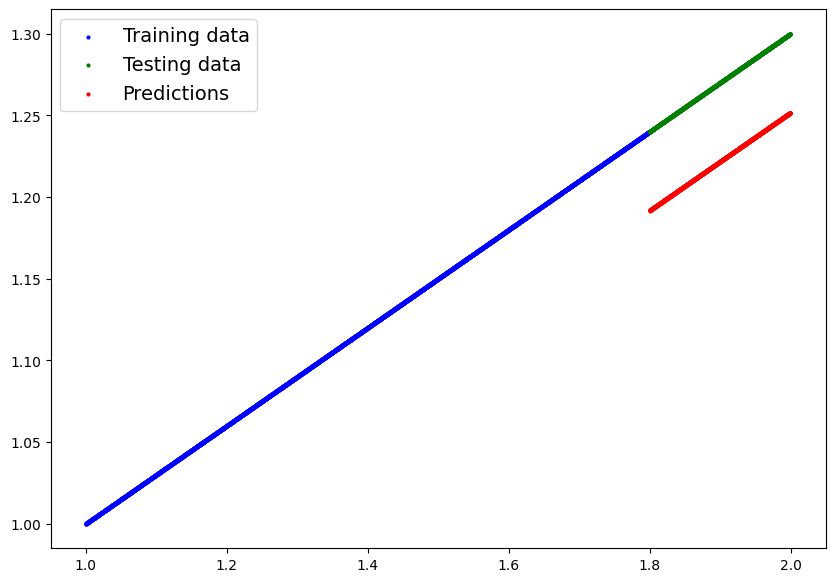

In [186]:
#Great output up ^ 
#Plotting for better visualisation -> 

model_2.eval()
with torch.inference_mode():
    y_prediction_reg=model_2(X_regression_test).to(device)
    
plot_predictions(X_regression_train.cpu(),y_regression_train.cpu(),X_regression_test.cpu(),y_regression_test.cpu(),y_prediction_reg.cpu())

Our Model works perfectly for linear data as it comprises of Linear Functions only. We need non-linearity to implement the circle selection model perfect.

## Non - Linearity 

In reality, If given an infinite amount of linear and non-linear functions, We can draw anything.

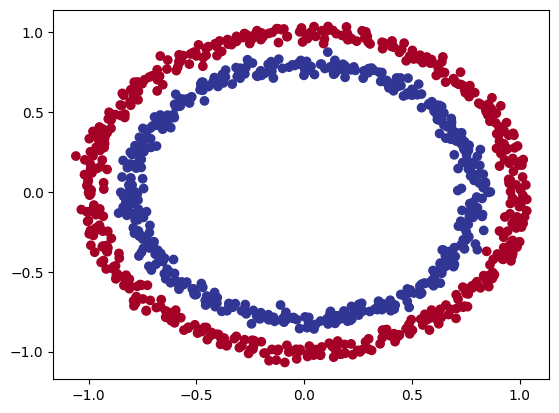

In [187]:
#Recreating non-linear data -> Red and Blue circles 
from sklearn.datasets import make_circles
n_sample_count=1000

X,y=make_circles(n_sample_count, noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

In [188]:
#Converting data into tensors and Splitting in Train and Test splits
import torch
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)
X_train,X_test,y_train,y_test = torch.from_numpy(X_train).type(torch.float).to(device),torch.from_numpy(X_test).type(torch.float).to(device),torch.from_numpy(y_train).type(torch.float).to(device),torch.from_numpy(y_test).type(torch.float).to(device)

print(X_train.shape , len(X_train), X_train.dtype , type(X_train),X_train[:5])
print(y_train.shape , len(y_train), y_train.dtype , type(y_train),y_train[:5])

torch.Size([800, 2]) 800 torch.float32 <class 'torch.Tensor'> tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]], device='cuda:0')
torch.Size([800]) 800 torch.float32 <class 'torch.Tensor'> tensor([1., 0., 0., 0., 1.], device='cuda:0')


### Building a Neural Network using Non-Linearity 

In [189]:
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Layers -> 
        self.layer1= nn.Linear(in_features=2,out_features=128)
        self.layer2= nn.Linear(in_features=128,out_features=128)
        self.layer3= nn.Linear(in_features=128,out_features=1)
        
        #Activation Function -> 
        self.relu=nn.ReLU()
        
    def forward(self,x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [190]:
model_3= CircleModelV3().to(device)
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_3.parameters(), lr = 0.02)


In [191]:
epochs = 10001 
for epoch in range (epochs):
    
    #Training 
    model_3.eval()
    y_pred_logits = model_3(X_train).squeeze()
    y_prob = torch.round(torch.sigmoid(y_pred_logits))
    
    loss = loss_fn(y_pred_logits, y_train)
    accuracy= accuracy_fn(y_true=y_train, y_pred=y_prob)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #Testing
    model_3.eval()
    with torch.inference_mode():
        test_pred_logits = model_3(X_test).squeeze()
        test_prob = torch.round(torch.sigmoid(test_pred_logits))
        test_loss=loss_fn(test_prob,y_test)
        test_accuracy=accuracy_fn(y_true=y_test,y_pred=test_prob)
    
    if epoch%1000==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch: 0 | Loss: 0.69356, Accuracy: 50.00% | Test Loss: 0.69315, Test Accuracy: 50.00%
Epoch: 1000 | Loss: 0.61431, Accuracy: 97.12% | Test Loss: 0.53600, Test Accuracy: 92.00%
Epoch: 2000 | Loss: 0.28045, Accuracy: 99.62% | Test Loss: 0.50820, Test Accuracy: 99.00%
Epoch: 3000 | Loss: 0.08067, Accuracy: 100.00% | Test Loss: 0.50320, Test Accuracy: 100.00%
Epoch: 4000 | Loss: 0.03760, Accuracy: 100.00% | Test Loss: 0.50320, Test Accuracy: 100.00%
Epoch: 5000 | Loss: 0.02301, Accuracy: 100.00% | Test Loss: 0.50320, Test Accuracy: 100.00%
Epoch: 6000 | Loss: 0.01620, Accuracy: 100.00% | Test Loss: 0.50320, Test Accuracy: 100.00%
Epoch: 7000 | Loss: 0.01236, Accuracy: 100.00% | Test Loss: 0.50320, Test Accuracy: 100.00%
Epoch: 8000 | Loss: 0.00991, Accuracy: 100.00% | Test Loss: 0.50320, Test Accuracy: 100.00%
Epoch: 9000 | Loss: 0.00824, Accuracy: 100.00% | Test Loss: 0.50320, Test Accuracy: 100.00%
Epoch: 10000 | Loss: 0.00703, Accuracy: 100.00% | Test Loss: 0.50320, Test Accuracy: 100.

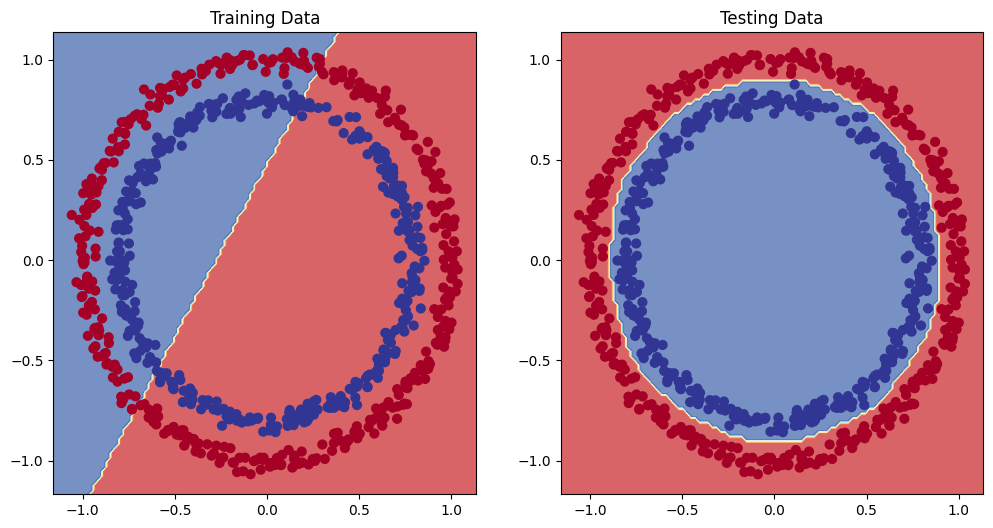

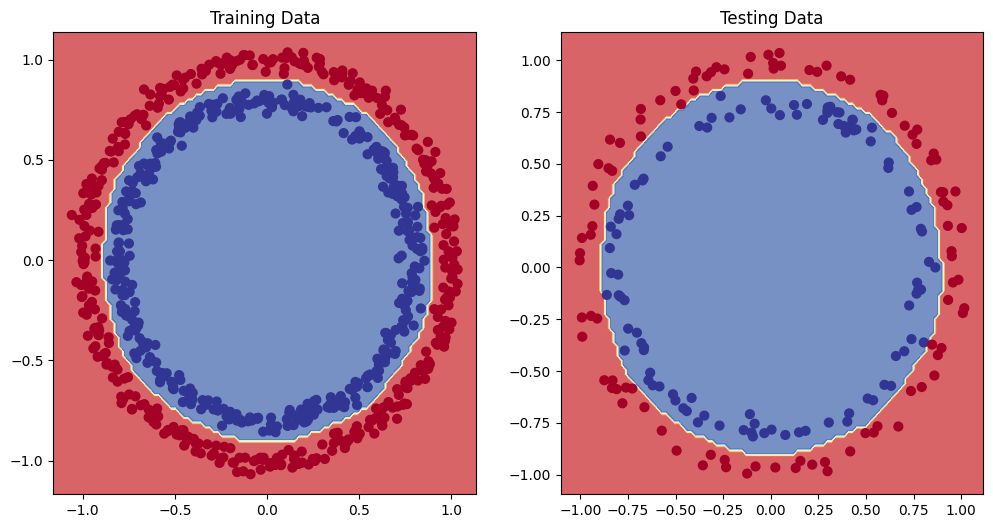

In [192]:
#Plotting model 1 and model 3 for comparision -> 

model3_predictions = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model_1,X_train,y_train) #Linear 

plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model_3,X_train,y_train) #Non-Linear

#Plotting Standalone
print("\n\n")
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model_3,X_train,y_train)  

plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model_3,X_test,y_test) 

### Replicating non-linear functions -> 


In [193]:
#Create a tensor -> 
A=torch.arange(-10.,11,1)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

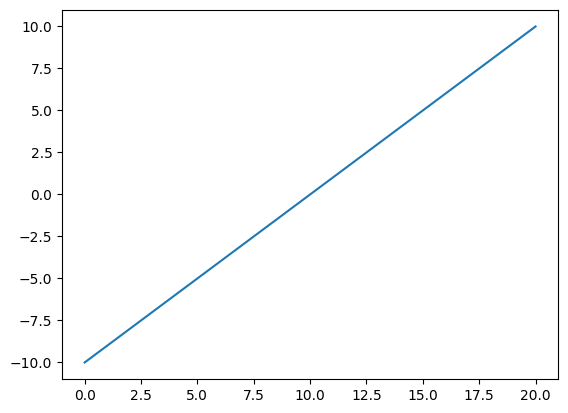

In [194]:
plt.plot(A)

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,
         4.,  5.,  6.,  7.,  8.,  9., 10.])

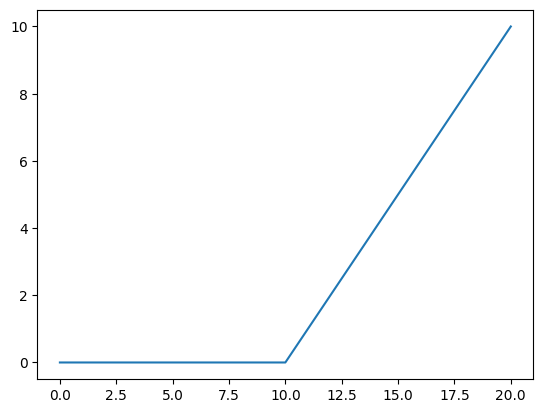

In [195]:
plt.plot(torch.relu(A))

#What ReLU is -> 
def relu(x):
    return torch.max(torch.tensor(0),x)

relu(A)

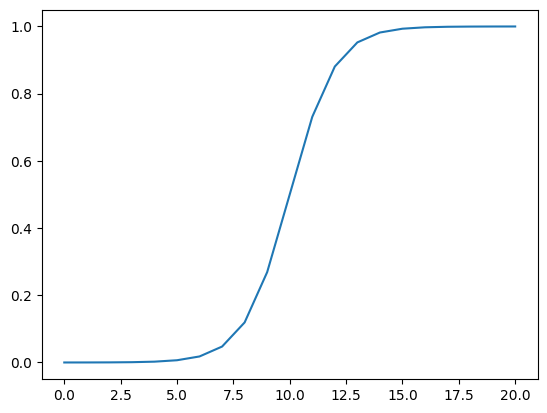

In [196]:

def sigmoid(x):
    return 1/(1+torch.exp(-x))

sigmoid(A)
plt.plot(sigmoid(A))

# Multiclass Models -> 

- Binary Classification -> A or B 
    - Ex -> Red Dot or Blue Dot, Spam or Not Spam

- Multiclass Classification -> A or B or ... or N
    - Ex -> Red or Green or Blue or Yellow or White or Black dot.

In [244]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs  #Read on scikit learn 
from sklearn.model_selection import train_test_split

#Setting Hyperparameters for Data Creation -> 

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

In [245]:
X_blob,y_blob = make_blobs(n_samples=10000,n_features=NUM_FEATURES, centers=NUM_CLASSES,random_state=RANDOM_SEED,cluster_std=1.5)

X_blob = torch.from_numpy(X_blob).type(torch.float).to(device)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor).to(device)

X_blob_train,X_blob_test,y_blob_train,y_blob_test =train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)


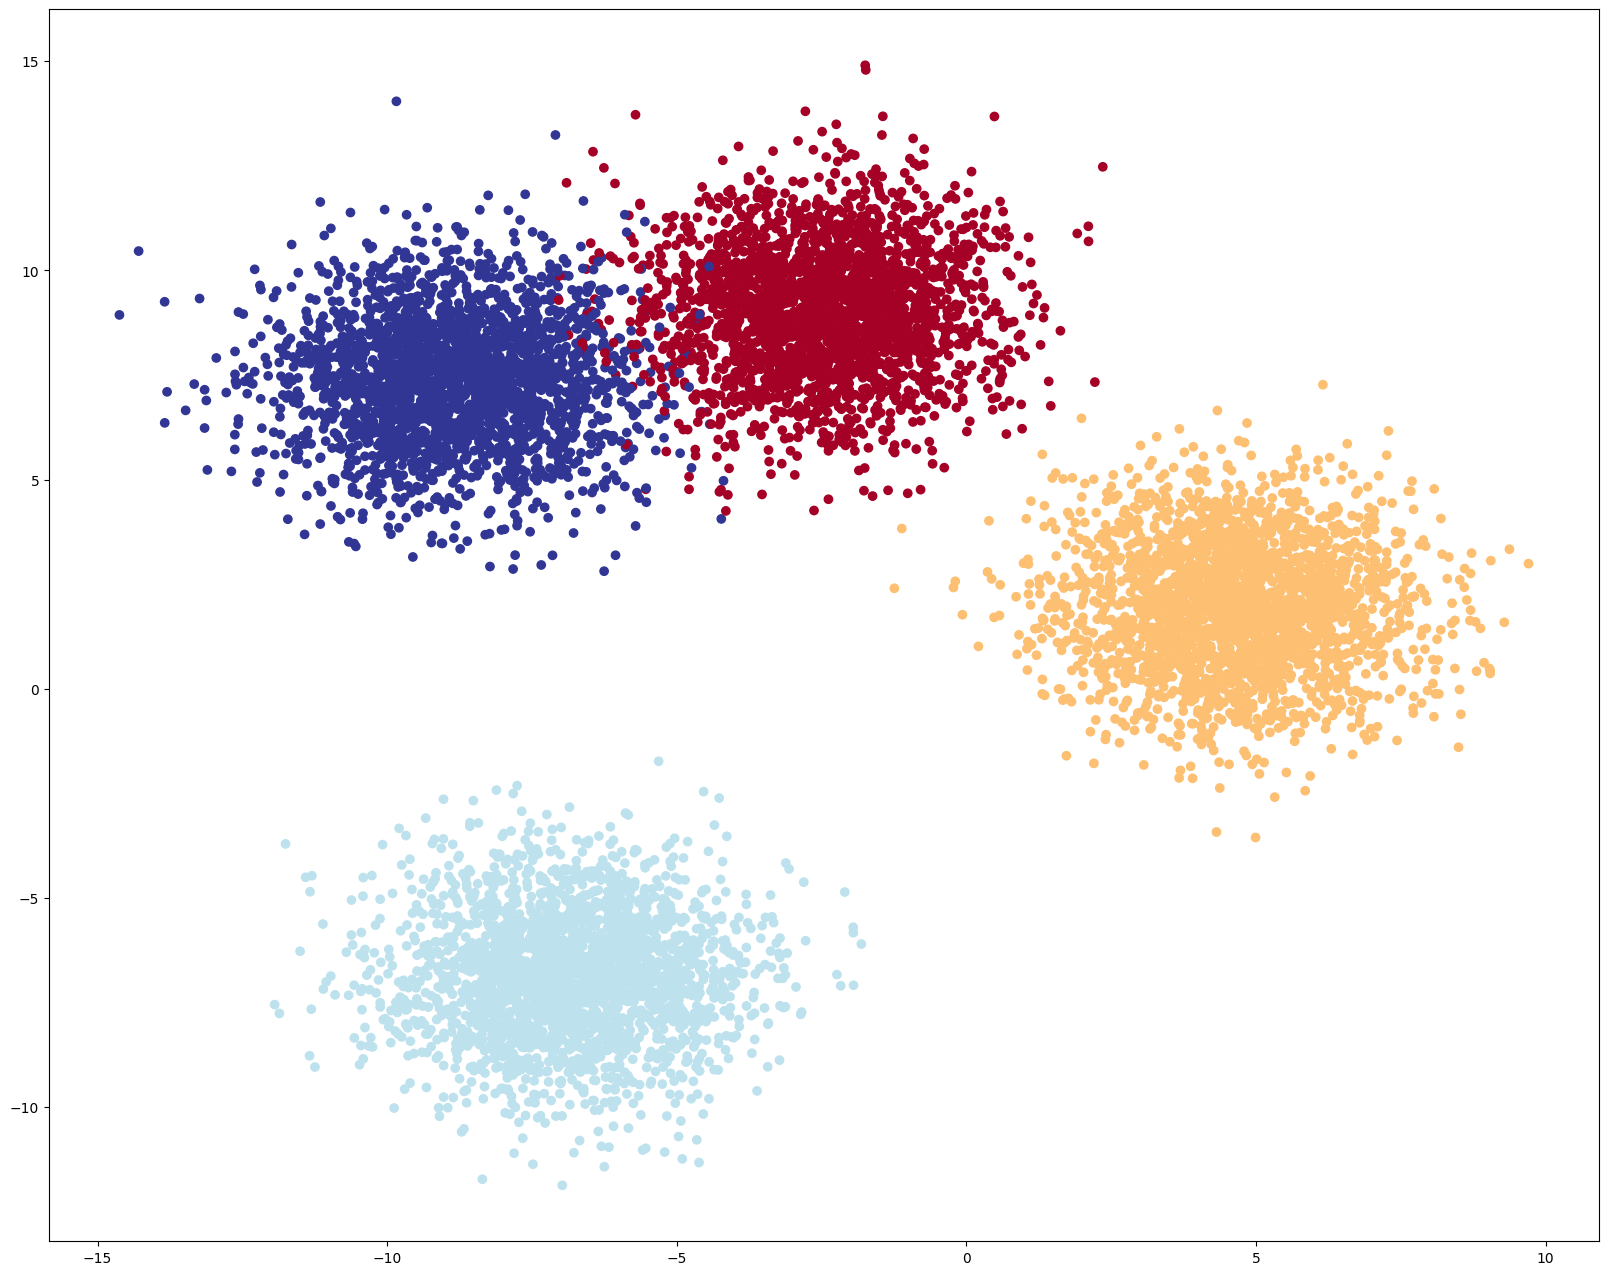

In [246]:
plt.figure(figsize=(20,16))

plt.scatter(X_blob[:,0].cpu(),X_blob[:,1].cpu(),c=y_blob.cpu(), cmap=plt.cm.RdYlBu)

In [247]:
#Device agnostic code -> 
device ="cuda" if torch.cuda.is_available()  else "cpu"
device

'cuda'

In [330]:
class BlobModel(nn.Module):
    
    def __init__(self,input_features, output_features, hidden_units = 8):
        super().__init__()

        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )
        
    def forward(self,x):
        return self.linear_layer_stack(x)

In [331]:
X_blob_train.shape , y_blob_train.shape,X_blob_test.dtype , y_blob_test.dtype

(torch.Size([8000, 2]), torch.Size([8000]), torch.float32, torch.int64)

In [332]:
#This gives the different classes in the y_blob data label
torch.unique(y_blob)

tensor([0, 1, 2, 3], device='cuda:0')

In [333]:
model_4=BlobModel(input_features=2,  #X_blob shape is the reason
                  output_features=4, #Our model has 4 different classes
                  hidden_units=8,    #By default but adding nonetheless
                  )
model_4.to(device)
print(model_4)

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)


In [334]:
#Creating a loss function and an optimizer -> 

loss_fn= torch.nn.CrossEntropyLoss() #This has a weight parameter which can be used to account for 
                                #unbalanced dataset, Ex -> If we didnt have equal number of RGBY dots.  
optimizer=torch.optim.SGD(params=model_4.parameters(), lr  = 0.01)

#### Getting prediction probabilities for a multi-class PyTorch model -> 

In order for correct evaluation, we need to convert the logit output of the our model into prediction probabilities and then those to prediction labels. 

Logits -> Prediction Probabilities by `softmax()` -> Prediction labels by `argmax()`

In [335]:
#Making initial predictions -> 
model_4.eval()
with torch.inference_mode():
    y_initial_logits = model_4(X_blob_test).to(device)
    
y_initial_logits, y_blob_test

#As we can see the output formats of our prediction and actual labels are very different.

(tensor([[-1.2548, -0.9130, -2.2454, -1.5358],
         [-0.6320, -0.6842, -1.2517, -0.8207],
         [-0.6838, -0.6438, -1.3876, -1.0143],
         ...,
         [-0.1047, -0.9648, -0.6006, -0.1291],
         [-0.0839, -0.9151, -0.5618, -0.1248],
         [-0.0903, -0.9124, -0.6185, -0.1707]], device='cuda:0'),
 tensor([1, 1, 1,  ..., 3, 3, 0], device='cuda:0'))

##### For converting the raw logits into prediction probabilities, We use `softmax()` in Multiclass models.

In [336]:
y_initial_pred_probs = torch.softmax(y_initial_logits, dim=1) 
print(y_initial_logits[:5])
print(y_initial_pred_probs[:5])

#Easily noticable that the sum of the elements in each tensor is 1, As they are the prediction probabilities, Now we can just get to the prediction labels using the argmax function.

tensor([[-1.2548, -0.9130, -2.2454, -1.5358],
        [-0.6320, -0.6842, -1.2517, -0.8207],
        [-0.6838, -0.6438, -1.3876, -1.0143],
        [ 0.1771, -0.3625,  0.0150,  0.0327],
        [-0.2116, -1.1999, -0.8497, -0.2009]], device='cuda:0')
tensor([[0.2830, 0.3983, 0.1051, 0.2137],
        [0.3016, 0.2863, 0.1623, 0.2498],
        [0.3073, 0.3198, 0.1520, 0.2208],
        [0.3031, 0.1767, 0.2578, 0.2624],
        [0.3435, 0.1279, 0.1815, 0.3472]], device='cuda:0')


In [337]:
#For the 5th  element, getting the prediction probability and the prediction label -> 
print(torch.sum(y_initial_pred_probs[4]))
print(torch.max(y_initial_pred_probs[4]))
print(torch.argmax(y_initial_pred_probs[4]))


tensor(1., device='cuda:0')
tensor(0.3472, device='cuda:0')
tensor(3, device='cuda:0')


In [338]:
#Converting the prediction probs to prediction labels 
y_initial_pred_labels=torch.argmax(y_initial_pred_probs, dim =1 ).float()  #DIM = 1 is IMPORTANT.
y_initial_pred_labels , y_blob_test

#Now they are of the same dimension. Same shape too (checked)

(tensor([1., 0., 1.,  ..., 0., 0., 0.], device='cuda:0'),
 tensor([1, 1, 1,  ..., 3, 3, 0], device='cuda:0'))

##### Creating a Training Loop for a multiclass PyTorch Model ->      

In [339]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Checking if the training,testing data is on the correct device/same device
X_blob_test.device,X_blob_train.device,y_blob_test.device,y_blob_train.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [340]:
#Writing the training loop -> 

epochs = 1001

for epoch in range(epochs):
    
    #Training -> 
    model_4.train()
    
    y_pred_logits = model_4(X_blob_train)
    y_pred_probs = torch.softmax(y_pred_logits, dim = 1)
    y_pred_labels = torch.argmax(y_pred_probs, dim = 1).type(torch.float)
    
    loss=loss_fn(y_pred_probs.squeeze(),y_blob_train)
    accuracy = accuracy_fn(y_true=y_blob_train,y_pred=y_pred_labels)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    
    #Testing ->     
    
    model_4.eval()
    
    with torch.inference_mode():
        test_pred_logits=model_4(X_blob_test)
        test_pred_labels = torch.softmax(test_pred_logits,dim=1).argmax(dim = 1)
        test_loss = loss_fn(test_pred_logits,y_blob_test)
        test_accuracy = accuracy_fn(y_blob_test,test_pred_labels)
        
    #Printing -> 
    if epoch%50==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {accuracy:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_accuracy:.2f}%\n")

Epoch: 0 | Loss: 1.32376, Acc: 38.05% | Test Loss: 1.15493, Test Acc: 39.70%

Epoch: 50 | Loss: 1.27148, Acc: 52.49% | Test Loss: 1.00581, Test Acc: 54.10%

Epoch: 100 | Loss: 1.21288, Acc: 60.90% | Test Loss: 0.87361, Test Acc: 62.15%

Epoch: 150 | Loss: 1.16953, Acc: 86.52% | Test Loss: 0.78025, Test Acc: 86.20%

Epoch: 200 | Loss: 1.13703, Acc: 93.51% | Test Loss: 0.70901, Test Acc: 92.70%

Epoch: 250 | Loss: 1.10837, Acc: 94.89% | Test Loss: 0.64766, Test Acc: 94.10%

Epoch: 300 | Loss: 1.07938, Acc: 95.50% | Test Loss: 0.58901, Test Acc: 94.85%

Epoch: 350 | Loss: 1.04809, Acc: 96.49% | Test Loss: 0.52935, Test Acc: 95.65%

Epoch: 400 | Loss: 1.01633, Acc: 96.95% | Test Loss: 0.47179, Test Acc: 96.50%

Epoch: 450 | Loss: 0.98775, Acc: 97.14% | Test Loss: 0.42148, Test Acc: 96.65%

Epoch: 500 | Loss: 0.96430, Acc: 97.31% | Test Loss: 0.38012, Test Acc: 96.80%

Epoch: 550 | Loss: 0.94548, Acc: 97.54% | Test Loss: 0.34604, Test Acc: 97.05%

Epoch: 600 | Loss: 0.92963, Acc: 97.84% | T

In [341]:
#Troubleshooting this was hard but fun^

#### Making and Evaluating Predictions Visually ->

In [342]:
#Making Predictions -> 
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
y_blob_prediction_labels = torch.softmax(y_logits, dim = 1).argmax(dim= 1)
y_blob_prediction_labels

tensor([1, 1, 1,  ..., 3, 3, 0], device='cuda:0')

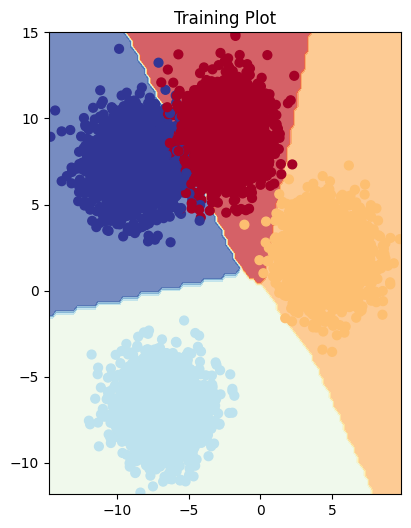

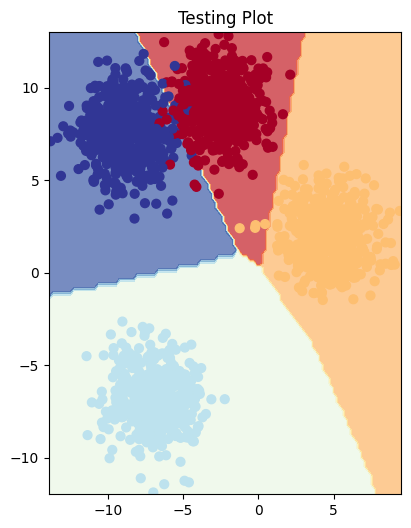

In [343]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Training Plot")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)

plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
plt.title("Testing Plot")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)




#### Few more evaluation metrics -> 

- So far we've only covered a couple of ways of evaluating a classification model (accuracy, loss and visualizing predictions).

| Metric name/Evaluation method | Defintion | Code |
|---|---|---|
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | torchmetrics.Accuracy() or sklearn.metrics.accuracy_score() |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | torchmetrics.Precision() or sklearn.metrics.precision_score() |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | torchmetrics.Recall() or sklearn.metrics.recall_score() |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | torchmetrics.F1Score() or sklearn.metrics.f1_score() |
| Confusion matrix | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | torchmetrics.ConfusionMatrix or sklearn.metrics.plot_confusion_matrix() |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | sklearn.metrics.classification_report() |


#### Scikit-Learn has many implementations of the above metrics and PyTorch has TorchMetrics.

In [350]:
#Trying torchmetric accuracy -> 

from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device)

torchmetrics_accuracy(y_blob_prediction_labels, y_blob_test)


#Multiple other torchmetrics classfications are there, More on torchmetrics.

tensor(0.9870, device='cuda:0')

## End of Binary and Multiclass Classification Models!
